In [37]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [38]:
from helpers import *
from helpers2 import * 
from costs import * 
from grid_search import * 
from gradient_descent import * 


In [39]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    #Meglio non usare np.lin.inv perchè è computazionalmente costoso 
    w = np.linalg.solve(tx.T @ tx , tx.T @ y)
    L = compute_loss(y,tx,w) 
    # returns mse, and optimal weights
    return w,L
    # ***************************************************
    raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [40]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO

    # Define the parameters of the algorithm.
    max_iters = 50
    gamma = 0.1
    # Initialization
    w_initial = np.array([100, 10])
    # Start gradient descent.
    gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

    # this code should compare the optimal weights obtained 
    w_least,L = least_squares(y,tx)
    # by least squares vs. grid search
    print('Least square solution:',w_least, '  Loss:', L)
    print('Gradient descent solution:',gradient_ws[-1],'  Loss:',gradient_losses[-1])
    # ***************************************************
    #raise NotImplementedError

Test it here

In [41]:
test_your_least_squares()

Gradient Descent(0/49): loss=378.0473881987589, w0=97.32939220021052, w1=10.347971243498908
Gradient Descent(1/49): loss=309.1417031360723, w0=94.92584518039999, w1=10.661145362647924
Gradient Descent(2/49): loss=253.32809823529618, w0=92.7626528625705, w1=10.943002069882038
Gradient Descent(3/49): loss=208.11907826566738, w0=90.81577977652397, w1=11.19667310639274
Gradient Descent(4/49): loss=171.49977209026807, w0=89.06359399908209, w1=11.424977039252374
Gradient Descent(5/49): loss=141.8381340881947, w0=87.4866267993844, w1=11.630450578826043
Gradient Descent(6/49): loss=117.81220730651526, w0=86.06735631965648, w1=11.815376764442345
Gradient Descent(7/49): loss=98.35120661335505, w0=84.79001288790136, w1=11.981810331497016
Gradient Descent(8/49): loss=82.58779605189518, w0=83.64040379932173, w1=12.13160054184622
Gradient Descent(9/49): loss=69.81943349711263, w0=82.60575561960007, w1=12.266411731160504
Gradient Descent(10/49): loss=59.47705982773877, w0=81.67457225785058, w1=12.387

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [42]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [43]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    matrix = np.zeros([len(x),degree + 1])
    for j in range(degree + 1):
        matrix[:,j] = x**j
    
    return matrix 
    # ***************************************************
    

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [44]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        tx = build_poly(x,degree)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        weights,loss = least_squares(y,tx)
        rmse = np.sqrt(2*loss)
        
        # ***************************************************
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773747
Processing 3th experiment, degree=7, rmse=0.2496587036090721
Processing 4th experiment, degree=12, rmse=0.245613674340116


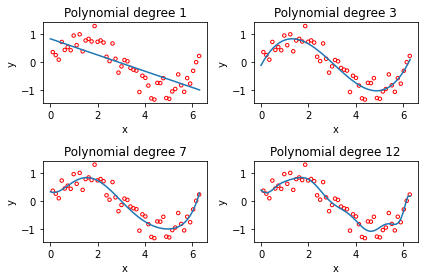

In [45]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [64]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    
    N = y.shape[0]
    N_tr = ratio * N
    indices = np.random.permutation(N)
    index_split = int(np.round(N_tr))
    index_tr = indices[:index_split]
    index_te = indices[index_split:]
    x_train = x[index_tr]
    x_test = x[index_te]
    y_train = y[index_tr]
    y_test = y[index_te]
    #Mia vecchia implementazione 
    '''N = len(x)
    index = int(np.round(N*ratio))
    x_train = x[:index]
    y_train = y[:index]
    x_test = x[index:]
    y_test = y[index:]'''
  
    
    return x_train,y_train,x_test,y_test
    
    
    # ***************************************************
    #raise NotImplementedError

Then, test your `split_data` function below.

In [65]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO   
    x_train,y_train,x_test,y_test = split_data(x,y,ratio,seed)
    
    #Se vuoi verificare che lo splitting è fatto bene, stampare qui sotto le dimensioni 
    #print('Dimensione of x:',len(x),'  Dimension of x_train:',len(x_train))
    # ***************************************************
    #raise NotImplementedError
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    tx_train = build_poly(x_train,degree)
    tx_test = build_poly(x_test,degree)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    w,L = least_squares(y_train,tx_train)
    L_test = compute_loss(y_test,tx_test,w)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = np.sqrt(2*L)
    rmse_te = np.sqrt(2*L_test)
    # ***************************************************
    #raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [66]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.255
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.167
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.075
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=3.227


# 3 Ridge Regression
Please fill in the function below.

In [67]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    N = len(y)
    w = np.linalg.solve(tx.T @ tx + 2*N*lambda_*np.identity(tx.shape[1]) , tx.T @ y) 
    return w
    # ***************************************************
    #raise NotImplementedError

In [68]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_train,y_train,x_test,y_test = split_data(x,y,ratio,seed)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    tx_train = build_poly(x_train,degree)
    tx_test = build_poly(x_test,degree)
    # ***************************************************
    #raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        w = ridge_regression(y_train,tx_train,lambda_)
        L_train = compute_loss(y_train,tx_train,w)
        L_test = compute_loss(y_test,tx_test,w)
        rmse_tr = np.append(rmse_tr , [np.sqrt(2*L_train)])
        rmse_te = np.append(rmse_te, [np.sqrt(2*L_test)])
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    #raise NotImplementedError


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

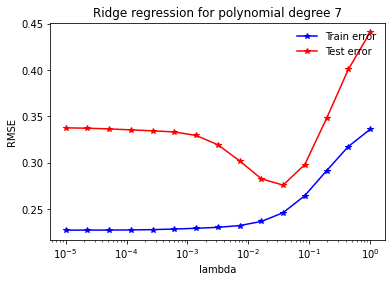

In [69]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [70]:
# 3 Theory Exercises


In [33]:
def compute_loss_relative(y, tx, w,eps):
    N = len(y)
    L = 0
    for i in range(N):
        L = L + ((y[i] - tx[i].T @ w )**2)/(y[i]**2 + eps)
    
    return L 

In [ ]:
#non completato perchè non avevo tempo e mi seccavo, ma leggere le domande a cui ho risposto sul quaderno 